In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Classes'}, ylabel='count'>

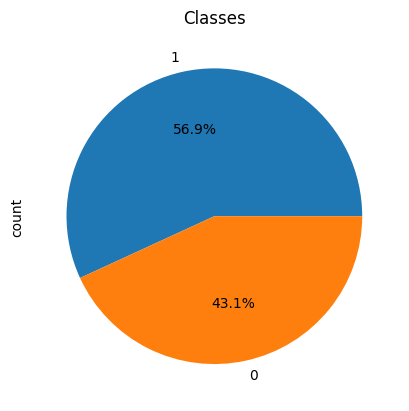

In [2]:
dfErro = pd.read_csv('dataset.csv')
dfErro['classe'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Classes')

In [3]:
print(dfErro['classe'].value_counts())

classe
1    9261
0    7026
Name: count, dtype: int64


In [4]:
has_missing = dfErro.isnull().values.any()
print(f"Há valores faltantes? {has_missing}")

Há valores faltantes? False


In [10]:
missing_data = dfErro.isna().sum()
missing_data_table = pd.DataFrame({'Coluna': missing_data.index, 'Dados Faltantes': missing_data.values})
missing_data_table

,Coluna,Dados Faltantes
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1206,1206,0
1207,1207,0
1208,1208,0
1209,1209,0


In [ ]:
#Histograma
num_columns = len(dfErro.columns)

# Definir o número de colunas no grid
ncols = 6
nrows = (num_columns // ncols) + (num_columns % ncols > 0)  # Calcula o número de linhas necessárias

# Cria a figura com o grid de subgráficos
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 3 * nrows))

# Flatten a matriz de eixos para iterar facilmente sobre eles
axes = axes.flatten()

# Plota os histogramas
for i, column in enumerate(dfErro.columns):
    axes[i].hist(dfErro[column], bins=30)
    axes[i].set_title(f'Histograma - {column}')

# Remove os subgráficos extras (caso o número de colunas seja menor que ncols*nrows)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [12]:
# Separar X e y
X = dfErro.iloc[:, :-1]  # Todas as colunas exceto a última (classe)
y = dfErro.iloc[:, -1]   # Última coluna (classe)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Obter a importância das features
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)

# Selecionar as 10 features mais importantes
top_features = feature_importances.nlargest(5).index

print("Top 5 Features Mais Importantes pelo MDI:")
print(top_features)

In [ ]:
#Lineplot

plt.figure(figsize=(12, 6))

for feature in top_features:
    sns.lineplot(data=dfErro[feature], label=feature)

plt.title("Lineplot de algumas features")
plt.xlabel("Índice da amostra")
plt.ylabel("Valor normalizado")
plt.legend()
plt.show()


In [ ]:
sns.pairplot(dfErro, vars=top_features, hue="classe", plot_kws={'alpha': 0.5})
plt.show()

In [ ]:
# Calcula a correlação de Pearson entre as features selecionadas
correlation_matrix_top_features = dfErro[top_features].corr()

# Exibe a matriz de correlação das 5 features mais importantes
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_top_features, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação de Pearson das 5 Features Mais Importantes")
plt.show()


In [17]:
# Verifica os valores mínimo e máximo de cada coluna (exceto a classe)
min_values = dfErro.iloc[:, :-1].min()
max_values = dfErro.iloc[:, :-1].max()

# Exibir se os valores estão entre 0 e 1
is_minmax = (min_values >= 0).all() and (max_values <= 1).all()
print(f"Os dados estão normalizados com MinMaxScaler? {is_minmax}")


Os dados estão normalizados com MinMaxScaler? True


In [18]:
# Calcula a média e o desvio padrão de cada coluna (exceto a classe)
means = dfErro.iloc[:, :-1].mean()
stds = dfErro.iloc[:, :-1].std()

# Verifica se a média está próxima de 0 e o desvio padrão próximo de 1
is_standard = (means.abs() < 1e-6).all() and ((stds - 1).abs() < 1e-6).all()
print(f"Os dados estão padronizados com StandardScaler? {is_standard}")


Os dados estão padronizados com StandardScaler? False


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfErro.iloc[:, :-1] = scaler.fit_transform(dfErro.iloc[:, :-1])

In [19]:
X = dfErro.drop(['classe'], axis = 1)
X = X.values
y = dfErro['classe']

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 2, shuffle=True, random_state=42)

param_grid_KNN = {'n_vizinhos': [3, 5, 7, 9, 11], 'metrica': ['euclidean', 'manhattan', 'minkowski', 'cosine']}
test_scores_KNN = []

In [ ]:
from sklearn.svm import SVC

param_grid_SVM = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}

test_scores_SVM = []

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier


for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_trainDivided, X_val, y_trainDivided, y_val = train_test_split(X_train, y_train, test_size=0.2)
    
    
    # ---------- KNN ----------
    accs_val_knn = []
    par_knn = []
    for params in ParameterGrid(param_grid_KNN):
        knn = KNeighborsClassifier(n_neighbors=params['n_vizinhos'], metric=params['metrica'])
        knn.fit(X_trainDivided, y_trainDivided)
        y_pred = knn.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        accs_val_knn.append(acc)
        par_knn.append(params)
        print(params, acc)
    print(f"Melhor para o fold: {par_knn[accs_val_knn.index(max(accs_val_knn))]} : {accs_val_knn[accs_val_knn.index(max(accs_val_knn))]}")
    
    knn_best = KNeighborsClassifier(metric = par_knn[accs_val_knn.index(max(accs_val_knn))]['metrica'], n_neighbors = par_knn[accs_val_knn.index(max(accs_val_knn))]['n_vizinhos'])
    knn_best.fit(X_train, y_train)
    y_pred = knn_best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_scores_KNN.append(acc)
    
    
    # ---------- SVM ----------
    accs_val_svm = []
    par_svm = []
    for params in ParameterGrid(param_grid_SVM):
        svm = SVC(C=params['C'], kernel=params['kernel'])
        svm.fit(X_trainDivided, y_trainDivided)
        y_pred = svm.predict(X_val)
        acc = accuracy_score(y_val, y_pred)
        accs_val_svm.append(acc)
        par_svm.append(params)
    
    svm_best = SVC(C = par_svm[accs_val_svm.index(max(accs_val_svm))]['C'], kernel = par_svm[accs_val_svm.index(max(accs_val_svm))]['kernel'])
    svm_best.fit(X_train, y_train)
    
    y_pred = svm_best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_scores_SVM.append(acc)
    
print(f"Acurácia média nos conjuntos de testes com o KNN: {sum(test_scores_KNN) / len(test_scores_KNN):.4f}")
    
    